# Data Analysis and Visualization Final Project 
____
# Topic: Education in Kyrgyzstan 

Student: Bekibaeva Aigerim (MATDAIS23)

Professor: Mr.Mekuria


#### Table of Contents:
1. Introduction
2. Data Collection
3. Data Preprocessing
4. Data Analysis
5. Data Visualization
6. Conclusion
7. References


### 1. Introduction
____
**Kyrgyzstan** is a Central Asian country with a rich cultural heritage and evolving education system.
This project analyzes educational trends in Kyrgyzstan using official government data.
It explores relationships between literacy rate, student enrollment, and government education expenditure.

**Education** is a vitally important branch not only of human development, but of country development. Seeing the trends in the education we can see the trends in the future, because knowledge can bring us the best future.


**Education** is a fundamental human right and a powerful tool for personal and societal development. Around the world, education is recognized as the key to breaking the cycle of poverty and building a more equal society. It empowers individuals with knowledge, skills, and critical thinking necessary for making informed decisions. Globally, countries with higher education levels tend to enjoy better economic growth, social stability, and innovation. Access to quality education promotes gender equality, health awareness, and environmental responsibility.

In the modern world, education is more than just reading and writing—it is about preparing people for a constantly changing job market. 
- Digital literacy, 
- communication, 
- problem-solving are now essential for success. 
Education also plays a crucial role in fostering peace, tolerance, and respect for diversity. International organizations such as the UN and UNESCO emphasize education in their sustainable development goals (SDGs), especially Goal 4: Quality Education.

In Kyrgyzstan, education has always been a valued part of cultural heritage and national development. The country has made efforts to provide access to education for all citizens, despite economic and regional challenges. Schools and universities in Kyrgyzstan play a vital role in shaping the future of the nation. Educated youth are seen as key drivers of innovation, technology, and economic growth.

However, issues like limited resources, rural-urban disparities, and outdated curricula still pose challenges to the educational system. That is why initiatives aimed at improving education quality, teacher training, and digital access are crucial for Kyrgyzstan’s future. Education also strengthens national identity, unity, and civic responsibility. A well-educated population contributes to better governance and stronger democratic institutions. In Kyrgyzstan, education helps preserve cultural traditions while connecting students to global opportunities.

Investing in education means investing in a better future—for individuals, communities, and the country as a whole. Ultimately, education remains one of the most powerful forces for progress in the world and in Kyrgyzstan alike.

#### 2. Data Collection
_____
Collection of data is very interesting and important part of the research. Most of the times it opens first doors for the researcher to start the journey of the data analysis. 

The data given below are mostly from National Statistical Open Sourse Site. However, some of them are made by me collecting main parts of the data into useful datasets.
Mainly data and datasets was provided by the samples of stat.gov.kg as well as just the information collected to special datasets created by me.
1. National Statistical Committee of the Kyrgyz Republic: https://stat.kg
2. Datasets used: 
- literacy_pop.xlsx — Literacy number (population aged 15+)
- student_enrollment.xlsx — Students in higher education by territory
- state_budget_expenditure.xls — Budget expenditures by terrirory
- literacy.csv - Literacy Rate by year
- students_enrollment.csv - Total Students in higher education by year
- education_expenditure.csv - Budget expenditures including education and GDP

In [2]:
# Import Libraries
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Sample data files from stat.gov.kg 
literacy = pd.read_excel('literacy_pop.xlsx')  
students = pd.read_excel('student_enrollment.xlsx')  
expenditure = pd.read_excel('state_budget_expenditure.xls')  

# Data files created by year
lit_year = pd.read_csv("literacy_by_year.csv")
expenditure_year = pd.read_csv("education_expenditure.csv")
students_year = pd.read_csv("student_enrollment_by_year.csv")

#### 3. Data Preprocessing
____ 
**Preprocessing of data** is needed in every research/project related to data. Because we want our insights to be clear, accurate and precise. Skipping this step can affect our conclusions and results in unimaginable ways, so they lose their actual meaning.

In [3]:
# Rename and clean columns for uniformity
literacy.rename({"Unnamed: 3": 2009, "Unnamed: 4": 2022, "Unnamed: 5": 2009}, axis=1, inplace=True)
literacy.drop(["Калктын сабаттуулугу"], axis=1, inplace=True)
literacy

,Грамотность населения,Literacy of population,2009,2022
0,"(по данным переписей населения, человек)",(people),NaN,NaN
1,NaN,NaN,NaN,NaN
2,Наименование показателей,Items,2009.0,2022.0
3,Численность населения в возрасте 15 лет и старше,Total population with education at age 15 yea...,3738226.0,4645716.0
4,Имеющие образование:,NaN,NaN,NaN
5,Высшее профессиональное,Higher professional education,463346.0,1134147.0
6,Неполное высшее профессиональное (незакончен...,Incomplete higher professional education (inco...,133196.0,226059.0
7,Среднее профессиональное,Secondary professional education,264208.0,819150.0
8,Начальное профессиональное,Initial professional education,197476.0,184963.0
9,Среднее общее,Secondary general education,1968846.0,1607987.0


In [4]:
students.drop(["Жогорку кесиптик билим беріі уюмдарындагы окучуулардын аймактар бобюнча саны"], axis=1, inplace=True)
students.rename({"Unnamed: 3": 2011, "Unnamed: 4": 2012, "Unnamed: 5": 2013, "Unnamed: 6": 2014, "Unnamed: 7": 2015,
                 "Unnamed: 8": 2016, "Unnamed: 9": 2017, "Unnamed: 10": 2018, "Unnamed: 11": 2019, "Unnamed: 12": 2020, 
                 "Unnamed: 13": 2021, "Unnamed: 14": 2022, "Unnamed: 15": 2023}, axis=1, inplace=True)
students

,Численность студентов организаций высшего профессионального образования по территории,The number of students in higher educational institutions by territory,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,(человек) ...,(people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Наименование показателей,Items,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017,2018,2019,2020,2021,2022,2023
3,Кыргызская Республика,Kyrgyz Republic,239208.0,231562.0,223241.0,214410.0,199505.0,175430.0,161406,164585,183778,214157,230206,227582,222940
4,Баткенская область,Batken oblast,9482.0,8555.0,7867.0,7508.0,6473.0,5241.0,4482,4735,5843,7668,10156,11836,10677
5,Джалал-Абадская область,Jalal-Abat oblast,15579.0,14162.0,12076.0,11532.0,10877.0,10473.0,7883,8474,9474,10569,10953,11731,11772
6,Иссык-Кульская область,Yssyk-Kul oblast,8098.0,7122.0,6471.0,5248.0,4659.0,3818.0,3188,2996,2824,3079,3481,4343,4403
7,Нарынская область,Naryn oblast,2742.0,2917.0,2916.0,2788.0,2434.0,2473.0,2825,3330,3197,3102,3006,3566,3292
8,Ошская область,Osh oblast,613.0,606.0,484.0,384.0,231.0,125.0,-,-,-,-,-,-,-
9,Таласская область,Talas oblast,2912.0,2419.0,2526.0,2309.0,2091.0,1929.0,1514,1561,1651,1699,1871,2003,1969


In [5]:
expenditure.drop(["Мамлекеттик бюджеттин чыгашалары"], axis=1, inplace=True)
expenditure.rename({"Unnamed: 3": 2006, "Unnamed: 4": 2007, "Unnamed: 5": 2008, "Unnamed: 6": 2009, "Unnamed: 7": 2010,
                 "Unnamed: 8": 2011, "Unnamed: 9": 2012, "Unnamed: 10": 2013, "Unnamed: 11": 2014, "Unnamed: 12": 2015, 
                 "Unnamed: 13": 2016, "Unnamed: 14": 2017, "Unnamed: 15": 2018, "Unnamed: 16": 2019, "Unnamed: 17": 2020, 
                 "Unnamed: 18": 2021, "Unnamed: 19": 2022, "Unnamed: 20": 2023, "Unnamed: 21": 2024}, axis=1, inplace=True)
expenditure

,Расходы государственного бюджета,The state budget expenditures,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(млн. сомов),(mln. soms),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Наименование показателей,Items,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
4,Кыргызская Республика1),Kyrgyz Republic1),25296.6,35859.4,45032.0,58628.2,68781.2,91544.1,107240.4,104271.3,...,134572.2,151558.9,166023.6,157796.0,167843.9,171873.9,211700.8,311142.3,379455.9,427148.3
5,Баткенская область,Batken oblast,418.5,543.1,703.1,854.9,936.2,1459.1,1795.1,1472.4,...,792.7,851.5,903.7,1031.0,1079.5,1021.1,1166.5,1319.6,1913.1,1891.8
6,Джалал-Абадская область,Jalal-Abat oblast,932.2,1254.4,1631.5,1992.1,2292.3,3324.9,3796.4,2939.8,...,1863.2,2014.8,2015.2,2359.0,2538.1,2332.1,2956.8,4119.0,6857.1,7397.5
7,Иссык-Кульская область,Yssyk-Kul oblast,613.5,679.1,929.4,1127.0,1040.9,1522.6,1691.7,1487.8,...,1097.0,1120.9,1185.1,1257.4,1373.4,1311.5,1688.4,2693.7,3571.1,4621.3
8,Нарынская область,Naryn oblast,389.1,450.8,665.5,776.1,831.8,1434.8,1605.4,1209.0,...,715.9,711.7,780.1,884.5,883.7,829.5,972.2,1238.9,1917.7,1790.2
9,Ошская область,Osh oblast,1046.7,1108.8,1699.4,1998.7,2149.2,3220.7,3638.0,2832.2,...,1639.8,1704.3,1889.9,2287.7,2292.5,1974.8,2601.4,3297.2,4222.2,4293.9


In [6]:
# Clean and Drop NaN values 
literacy.dropna(inplace=True)
literacy

,Грамотность населения,Literacy of population,2009,2022
2,Наименование показателей,Items,2009.0,2022.0
3,Численность населения в возрасте 15 лет и старше,Total population with education at age 15 yea...,3738226.0,4645716.0
5,Высшее профессиональное,Higher professional education,463346.0,1134147.0
6,Неполное высшее профессиональное (незакончен...,Incomplete higher professional education (inco...,133196.0,226059.0
7,Среднее профессиональное,Secondary professional education,264208.0,819150.0
8,Начальное профессиональное,Initial professional education,197476.0,184963.0
9,Среднее общее,Secondary general education,1968846.0,1607987.0
10,Основное общее,Incomplete secondary education,443594.0,442062.0
11,Начальное общее,Elementary education,203717.0,182196.0
12,Не имеющие начального общего,Formal education,63843.0,49152.0


In [7]:
students.dropna(inplace=True)
students

,Численность студентов организаций высшего профессионального образования по территории,The number of students in higher educational institutions by territory,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Наименование показателей,Items,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017,2018,2019,2020,2021,2022,2023
3,Кыргызская Республика,Kyrgyz Republic,239208.0,231562.0,223241.0,214410.0,199505.0,175430.0,161406,164585,183778,214157,230206,227582,222940
4,Баткенская область,Batken oblast,9482.0,8555.0,7867.0,7508.0,6473.0,5241.0,4482,4735,5843,7668,10156,11836,10677
5,Джалал-Абадская область,Jalal-Abat oblast,15579.0,14162.0,12076.0,11532.0,10877.0,10473.0,7883,8474,9474,10569,10953,11731,11772
6,Иссык-Кульская область,Yssyk-Kul oblast,8098.0,7122.0,6471.0,5248.0,4659.0,3818.0,3188,2996,2824,3079,3481,4343,4403
7,Нарынская область,Naryn oblast,2742.0,2917.0,2916.0,2788.0,2434.0,2473.0,2825,3330,3197,3102,3006,3566,3292
8,Ошская область,Osh oblast,613.0,606.0,484.0,384.0,231.0,125.0,-,-,-,-,-,-,-
9,Таласская область,Talas oblast,2912.0,2419.0,2526.0,2309.0,2091.0,1929.0,1514,1561,1651,1699,1871,2003,1969
10,Чуйская область,Chui oblast,2683.0,2542.0,2685.0,2559.0,1928.0,1466.0,1617,2373,3719,5058,5926,6238,6290
11,г.Бишкек,Bishkek City,149330.0,147705.0,143802.0,138712.0,128862.0,112551.0,106446,105056,108174,113101,113531,117092,122695


In [8]:
expenditure.dropna(inplace=True)
expenditure

,Расходы государственного бюджета,The state budget expenditures,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3,Наименование показателей,Items,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
4,Кыргызская Республика1),Kyrgyz Republic1),25296.6,35859.4,45032.0,58628.2,68781.2,91544.1,107240.4,104271.3,...,134572.2,151558.9,166023.6,157796.0,167843.9,171873.9,211700.8,311142.3,379455.9,427148.3
5,Баткенская область,Batken oblast,418.5,543.1,703.1,854.9,936.2,1459.1,1795.1,1472.4,...,792.7,851.5,903.7,1031.0,1079.5,1021.1,1166.5,1319.6,1913.1,1891.8
6,Джалал-Абадская область,Jalal-Abat oblast,932.2,1254.4,1631.5,1992.1,2292.3,3324.9,3796.4,2939.8,...,1863.2,2014.8,2015.2,2359.0,2538.1,2332.1,2956.8,4119.0,6857.1,7397.5
7,Иссык-Кульская область,Yssyk-Kul oblast,613.5,679.1,929.4,1127.0,1040.9,1522.6,1691.7,1487.8,...,1097.0,1120.9,1185.1,1257.4,1373.4,1311.5,1688.4,2693.7,3571.1,4621.3
8,Нарынская область,Naryn oblast,389.1,450.8,665.5,776.1,831.8,1434.8,1605.4,1209.0,...,715.9,711.7,780.1,884.5,883.7,829.5,972.2,1238.9,1917.7,1790.2
9,Ошская область,Osh oblast,1046.7,1108.8,1699.4,1998.7,2149.2,3220.7,3638.0,2832.2,...,1639.8,1704.3,1889.9,2287.7,2292.5,1974.8,2601.4,3297.2,4222.2,4293.9
10,Таласская область,Talas oblast,257.5,312.8,409.2,459.8,513.8,827.5,937.5,718.1,...,447.1,438.3,515.5,589.5,601.4,527.6,719.8,849.5,1371.9,1984.0
11,Чуйская область,Chui oblast,1103.8,1195.7,1710.3,1887.6,2006.1,2712.9,2987.4,2752.3,...,2419.1,2295.0,2431.0,2499.9,2838.2,2639.1,3190.4,4058.1,5239.8,6541.3
12,г.Бишкек,Bishkek City,1833.1,2913.3,4019.5,4530.9,4770.7,5755.8,5768.6,6191.0,...,7280.6,7367.9,8360.3,7764.9,8506.6,8184.1,9418.5,14493.3,22518.3,33491.0


In [9]:
# Since other data files are created from scratch by me, they are clean and in appropriate format already.

In [10]:
# Get the info about data
literacy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2 to 14
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Грамотность населения   11 non-null     object 
 1   Literacy of population  11 non-null     object 
 2   2009                    11 non-null     float64
 3   2022                    11 non-null     float64
dtypes: float64(2), object(2)
memory usage: 440.0+ bytes


In [11]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2 to 12
Data columns (total 15 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Численность студентов организаций высшего профессионального образования по территории  11 non-null     object 
 1   The number of students in higher educational institutions by territory                 11 non-null     object 
 2   2011                                                                                   11 non-null     float64
 3   2012                                                                                   11 non-null     float64
 4   2013                                                                                   11 non-null     float64
 5   2014                                                                                 

In [12]:
expenditure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 3 to 13
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Расходы государственного бюджета   11 non-null     object 
 1   The state budget expenditures      11 non-null     object 
 2   2006                               11 non-null     float64
 3   2007                               11 non-null     float64
 4   2008                               11 non-null     float64
 5   2009                               11 non-null     float64
 6   2010                               11 non-null     float64
 7   2011                               11 non-null     float64
 8   2012                               11 non-null     float64
 9   2013                               11 non-null     float64
 10  2014                               11 non-null     float64
 11  2015                               11 non-null     float64
 12  2

In [13]:
lit_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               10 non-null     int64  
 1   Literacy Rate (%)  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [14]:
students_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Year                                    9 non-null      int64
 1   Number of students in higher education  9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes


In [15]:
expenditure_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             9 non-null      int64  
 1   Education Expenditure (mln KGS)  9 non-null      float64
 2   Total Budget (mln KGS)           9 non-null      float64
 3   GDP (mln KGS)                    9 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 420.0 bytes


#### 4. Data Analysis
____ 
**Data Analysis** is the main part of our project. Here we will try our best to find out more about trends, correlations, tests and real meaning in our data. Analysing will help us get insights by "words", but with some statistical and mathematical base. 

In this part we will use: 
1. Descriptive Statistics
2. Correlation Matrix 
3. Pearson Coefficient and P-Value

In [16]:
# Descriptive Statistics with built-in function
print("Descriptive Statistics:")
print("Literacy of Population")
print(literacy.describe())


Descriptive Statistics:
Literacy of Population
               2009          2022
count  1.100000e+01  1.100000e+01
mean   6.824381e+05  8.527076e+05
std    1.153783e+06  1.358351e+06
min    2.009000e+03  2.022000e+03
25%    9.851950e+04  1.342630e+05
50%    2.037170e+05  2.260590e+05
75%    4.534700e+05  9.766485e+05
max    3.738226e+06  4.645716e+06


In [17]:
print("\nNumber of students in higher education")
print(students.describe())



Number of students in higher education
                2011           2012           2013           2014  \
count      11.000000      11.000000      11.000000      11.000000   
mean    43675.181818   42285.090909   40772.272727   39166.727273   
std     78259.098388   76283.985690   73809.196522   71035.217545   
min       613.000000     606.000000     484.000000     384.000000   
25%      2712.500000    2480.500000    2605.500000    2434.000000   
50%      8098.000000    7122.000000    6471.000000    5248.000000   
75%     31674.000000   29848.000000   28245.000000   27451.000000   
max    239208.000000  231562.000000  223241.000000  214410.000000   

                2015           2016  
count      11.000000      11.000000  
mean    36456.818182   32079.636364  
std     66141.824592   58039.981734  
min       231.000000     125.000000  
25%      2053.000000    1972.500000  
50%      4659.000000    3818.000000  
75%     26413.500000   23913.500000  
max    199505.000000  175430.00000

In [18]:
print("\nState budget expenditure for the Education")
print(expenditure.describe())


State budget expenditure for the Education
               2006          2007          2008          2009          2010  \
count     11.000000     11.000000     11.000000     11.000000     11.000000   
mean    3106.509091   4245.945455   5394.336364   6810.481818   7830.000000   
std     7383.599827  10514.458467  13186.000118  17223.200956  20250.199255   
min      257.500000    312.800000    409.200000    459.800000    513.800000   
25%      403.800000    496.950000    684.300000    815.500000    884.000000   
50%      932.200000   1108.800000   1631.500000   1887.600000   2006.100000   
75%     1468.450000   1630.700000   1859.150000   2003.850000   2220.750000   
max    25296.600000  35859.400000  45032.000000  58628.200000  68781.200000   

               2011           2012           2013           2014  \
count     11.000000      11.000000      11.000000      11.000000   
mean   10452.327273   12086.190909   11547.045455   12651.445455   
std    26931.509602   31590.002000   307

In [19]:
print("Literacy Rate by Year")
lit_year.describe()

Literacy Rate by Year


,Year,Literacy Rate (%)
count,10.00000,10.000000
mean,2019.50000,98.820000
std,3.02765,0.575036
min,2015.00000,97.900000
25%,2017.25000,98.425000
50%,2019.50000,98.950000
75%,2021.75000,99.175000
max,2024.00000,99.600000


In [20]:
# Merge datasets on 'Year'
data = pd.merge(lit_year, students_year, on='Year')
data = pd.merge(data, expenditure_year, on='Year')
data

,Year,Literacy Rate (%),Number of students in higher education,Education Expenditure (mln KGS),Total Budget (mln KGS),GDP (mln KGS)
0,2015,99.0,199505,1639.8,134572.2,430489.4
1,2016,97.9,175430,1704.3,151558.9,476331.2
2,2017,98.4,161406,1889.9,166023.6,530475.7
3,2018,99.5,164585,2287.7,157796.0,569385.6
4,2019,99.6,183778,2292.5,167843.9,619102.7
5,2020,99.2,214157,1974.8,171873.9,601820.3
6,2021,98.5,230206,2601.4,211700.8,723122.2
7,2022,98.1,227582,3297.2,311142.3,1020744.6
8,2023,99.1,222940,4222.2,379455.9,1333730.0


In [21]:
# Create new variable: expenditure per student
data['expenditure_per_student'] = (data['Education Expenditure (mln KGS)'] * 1e6) / data['Number of students in higher education']
data['edu_expenditure_percent'] = (data['Education Expenditure (mln KGS)'] / data['Total Budget (mln KGS)']) * 100
data

,Year,Literacy Rate (%),Number of students in higher education,Education Expenditure (mln KGS),Total Budget (mln KGS),GDP (mln KGS),expenditure_per_student,edu_expenditure_percent
0,2015,99.0,199505,1639.8,134572.2,430489.4,8219.342874,1.218528
1,2016,97.9,175430,1704.3,151558.9,476331.2,9714.986034,1.124513
2,2017,98.4,161406,1889.9,166023.6,530475.7,11708.982318,1.138332
3,2018,99.5,164585,2287.7,157796.0,569385.6,13899.808610,1.449783
4,2019,99.6,183778,2292.5,167843.9,619102.7,12474.289632,1.365852
5,2020,99.2,214157,1974.8,171873.9,601820.3,9221.272244,1.148982
6,2021,98.5,230206,2601.4,211700.8,723122.2,11300.313632,1.228810
7,2022,98.1,227582,3297.2,311142.3,1020744.6,14487.964778,1.059708
8,2023,99.1,222940,4222.2,379455.9,1333730.0,18938.727909,1.112698


In [22]:
# Correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


,Year,Literacy Rate (%),Number of students in higher education,Education Expenditure (mln KGS),Total Budget (mln KGS),GDP (mln KGS),expenditure_per_student,edu_expenditure_percent
Year,1.000000,0.067433,0.731122,0.878352,0.854744,0.880485,0.721618,-0.263861
Literacy Rate (%),0.067433,1.000000,-0.119593,0.048255,-0.124011,-0.015100,0.159546,0.717715
Number of students in higher education,0.731122,-0.119593,1.000000,0.598555,0.647228,0.636374,0.232461,-0.463872
Education Expenditure (mln KGS),0.878352,0.048255,0.598555,1.000000,0.973734,0.989632,0.916020,-0.273262
Total Budget (mln KGS),0.854744,-0.124011,0.647228,0.973734,1.000000,0.992752,0.848160,-0.482153
GDP (mln KGS),0.880485,-0.015100,0.636374,0.989632,0.992752,1.000000,0.877931,-0.394980
expenditure_per_student,0.721618,0.159546,0.232461,0.916020,0.848160,0.877931,1.000000,-0.050906
edu_expenditure_percent,-0.263861,0.717715,-0.463872,-0.273262,-0.482153,-0.394980,-0.050906,1.000000


Here are some insights about the correlation between many different attributes, however most of the positive correlations we can see over time, thus with the attribute "Year". This correlation we will see in the visualization part as well.

In [23]:
# Pearson correlation
corr, p_val = pearsonr(data['edu_expenditure_percent'], data['Literacy Rate (%)'])
print(f"\nCorrelation between Education Expenditure (% GDP) and Literacy Rate: {corr:.2f}, p-value: {p_val:.3f}")


Correlation between Education Expenditure (% GDP) and Literacy Rate: 0.72, p-value: 0.029


Here we can see a strong positive correlation between Education Expenditure and Literacy Rate 0.72 (>0.5) and also p-value can provide us the validation of the correlation because it is lower than the threshold 0.029 < 0.05. 

#### 5. Data Visualization
____
**Data Visualization** is a very important part of any research. Because it helps to maintain huge amount of data and insights in one page and make it understandable at a glance. It is very useful for delivering some mathematical or statistical conclusions to people who are not familiar with such topics.

##### Let's visualize!

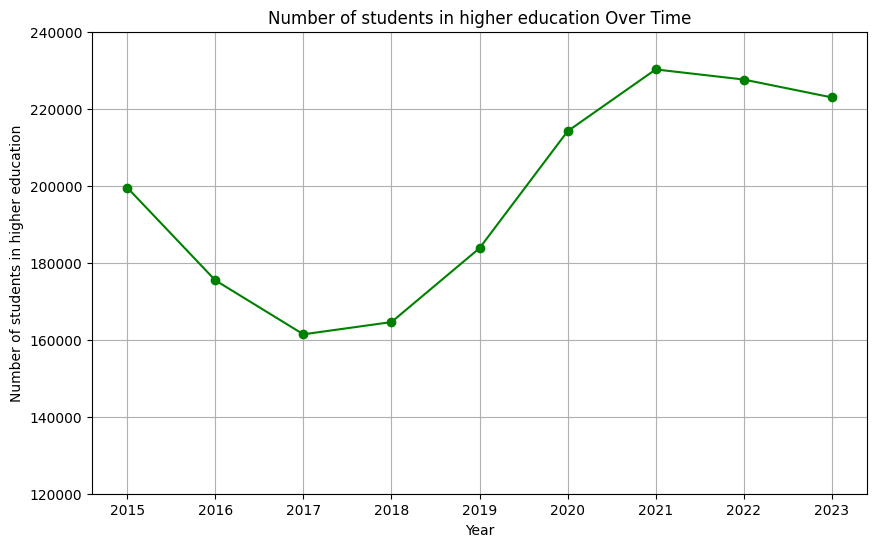

In [24]:
# Number of students over time 
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Number of students in higher education'], marker='o', color="green")
plt.title('Number of students in higher education Over Time')
plt.xlabel('Year')
plt.ylabel('Number of students in higher education')
plt.ylim(120000, 240000)
plt.grid(True)
plt.show()

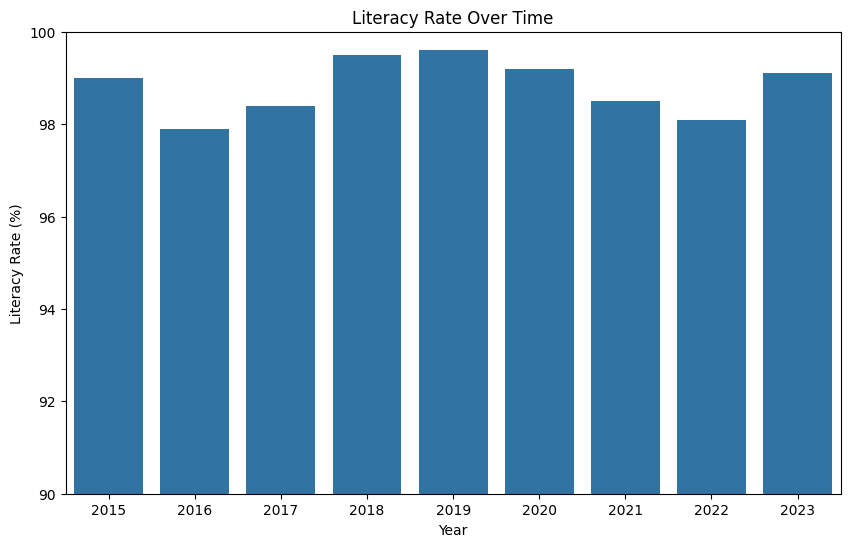

In [25]:
# Literacy rate over time
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Literacy Rate (%)', data=data)
plt.title('Literacy Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.ylim(90, 100)
plt.show()

The plot titled "Literacy Rate Over Time" shows how the literacy rate in Kyrgyzstan has changed year by year. It is important because it reflects one of the core indicators of a country's educational success — the ability of its population to read and write. Literacy is not only a basic human right but also a foundation for lifelong learning, personal empowerment, and participation in society.

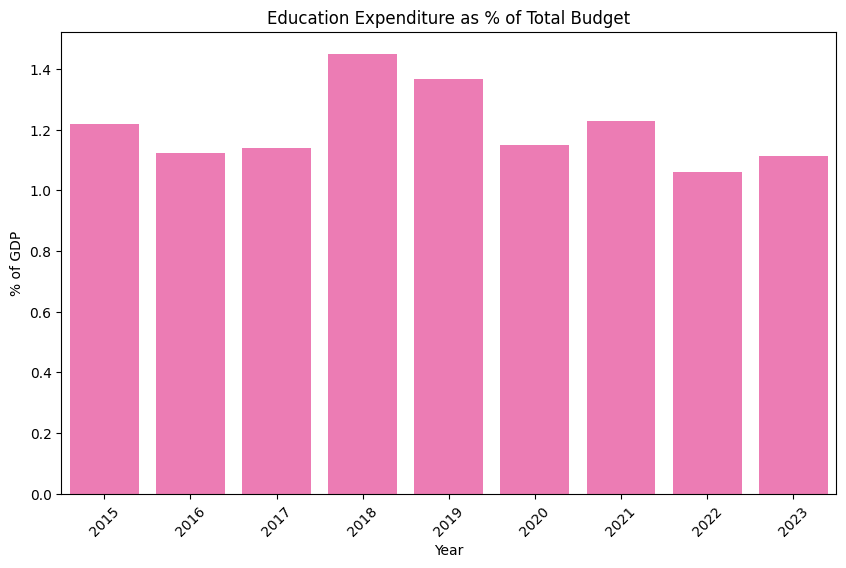

In [26]:
# Education expenditure (% GDP)
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='edu_expenditure_percent', data=data, color="hotpink")
plt.title('Education Expenditure as % of Total Budget')
plt.xticks(rotation=45)
plt.ylabel('% of GDP')
plt.show()

This plot visualizes how much of Kyrgyzstan's Total Budget is spent on education each year. It gives insight into government priorities and how they may relate to other indicators like literacy or enrollment, as well as the next one.

A rising trend in this percentage could indicate growing government attention to education, potentially leading to improvements in infrastructure, teacher salaries, and access to education. Conversely, a declining trend might raise concerns about underinvestment or shifting national priorities.

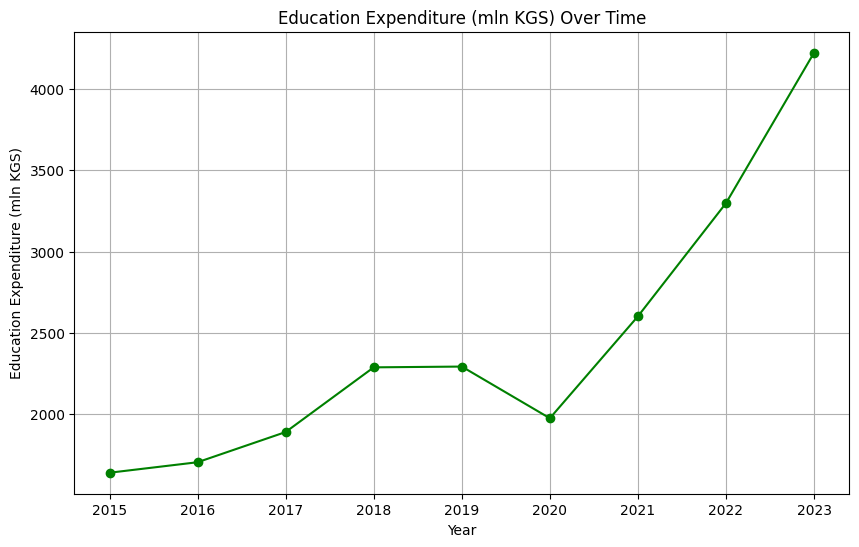

In [27]:
# Plot: Expenditure Over Time
plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Education Expenditure (mln KGS)'], marker='o', color="green")
plt.title('Education Expenditure (mln KGS) Over Time')
plt.xlabel('Year')
plt.ylabel('Education Expenditure (mln KGS)')
plt.grid(True)
plt.show()

This is especially important for evaluating whether education budgets are keeping pace with inflation, population growth, and the increasing demands of modern education systems. A growing line in this plot may suggest the state is prioritizing education more heavily, whereas a stagnant or declining trend may raise concerns about underfunding or reallocation to other sectors.

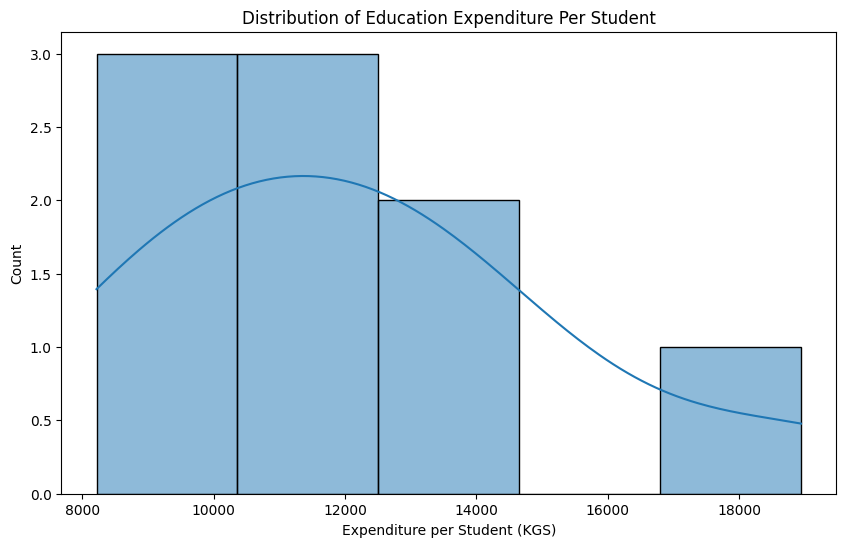

In [28]:
# Expenditure per student distribution
plt.figure(figsize=(10,6))
sns.histplot(data['expenditure_per_student'], kde=True)
plt.title('Distribution of Education Expenditure Per Student')
plt.xlabel('Expenditure per Student (KGS)')
plt.show()


This plot helps visualize whether the government consistently spent a similar amount on each student or if there were big variations across years. Since it's skewed the expenditure was not consistent.

Understanding the distribution also helps policymakers recognize whether there are potential inefficiencies or imbalances that could affect educational outcomes. 

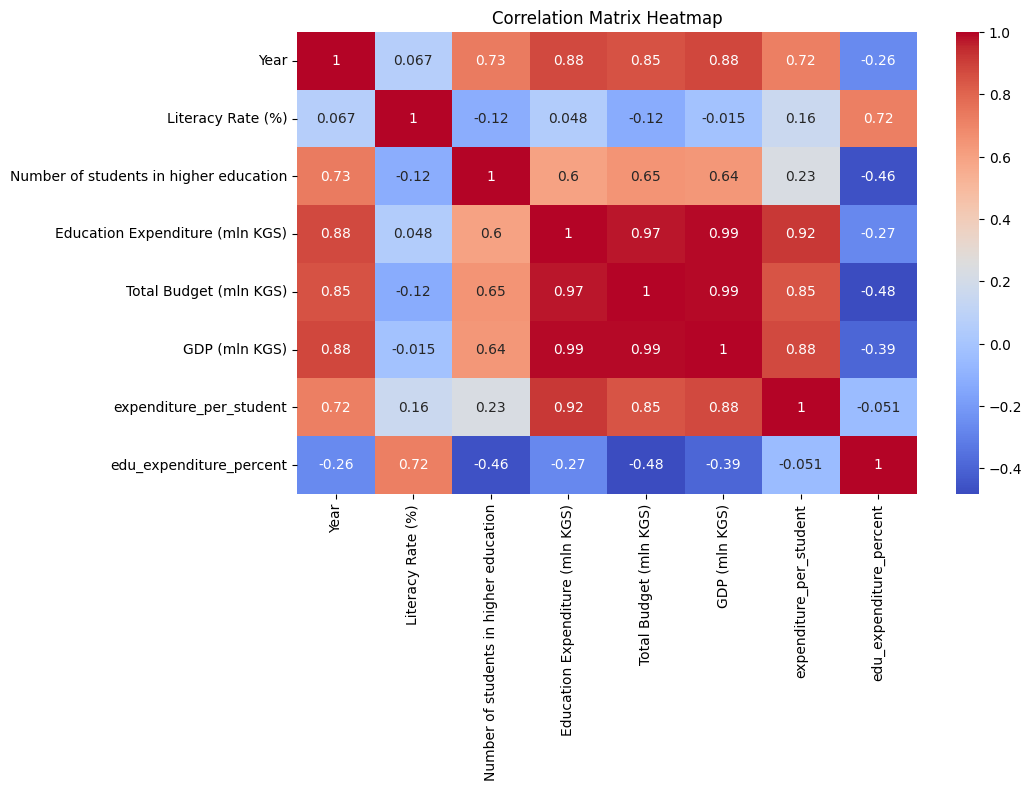

In [29]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

It’s a quick way to see which factors (like literacy rate, enrollment, or expenditure) may influence or relate to each other. It helps in prioritizing funding, adjusting strategies, and improving educational outcomes efficiently. Without such visualizations, identifying these patterns from raw data or tables would be much harder and prone to misinterpretation.

And also it is much easier to understand than just correlation matrix.
#### This is the advantage of data visualization

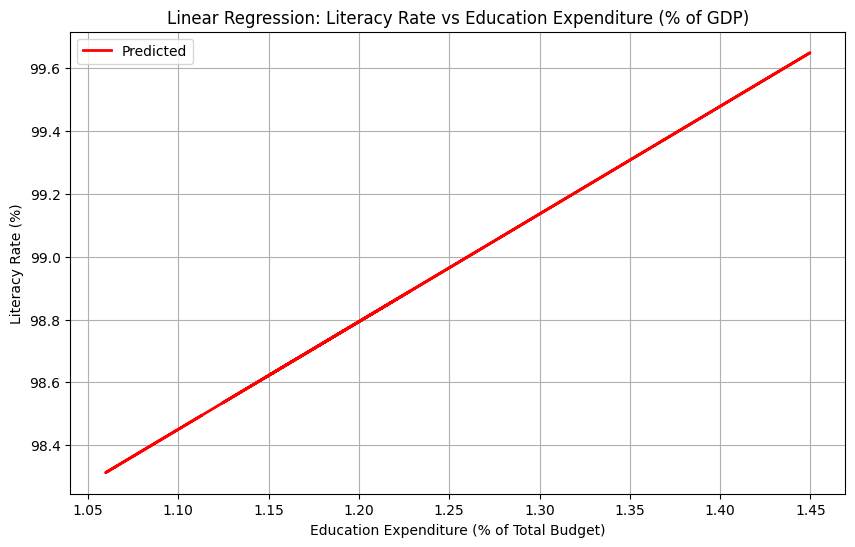

Intercept: 94.68
Coefficient: 3.43
R^2 Score: 0.52
Mean Squared Error: 0.16


In [ ]:
# 6. Linear Regression Model
# Hypothesis: Higher government expenditure on education leads to higher literacy rates
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['edu_expenditure_percent']]
y = data['Literacy Rate (%)']

# Fit the model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.figure(figsize=(10,6))
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Literacy Rate vs Education Expenditure (% of GDP)')
plt.xlabel('Education Expenditure (% of Total Budget)')
plt.ylabel('Literacy Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Print regression coefficients and performance
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"R^2 Score: {r2_score(y, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.2f}")

By using linear regression, we can examine whether increases in education funding are associated with improvements in literacy. Even if the correlation is weak, this method helps confirm whether the relationship is statistically significant or likely due to chance. The regression line provides a visual and analytical summary of this relationship, making it easier for policymakers and analysts to interpret complex data.

### 6. Conclusion
_____
**The literacy rate** in Kyrgyzstan has consistently remained high from 2015 onward, fluctuating only slightly from year to year. This suggests that the country has successfully maintained basic education levels across the population aged 15 and older.
Showing consistency in basic education of each person is a great step forward.

While there is a positive correlation between education expenditure (as a percentage of GDP) and literacy rate,
the correlation is relatively weak, indicating that other social or systemic factors may also play a significant role in literacy.
Nevertheless, government **investment in education** appears to support a stable foundation for learning.

The analysis of **expenditure per student** shows substantial variation over time, which could reflect shifts in policy,
budget allocation, or changes in student enrollment numbers.
These fluctuations indicate that there is room for optimizing investment in education to improve both efficiency and outcomes.
Monitoring and stabilizing expenditure per student could help provide more consistent educational quality.
Further research could explore qualitative aspects of education to complement the quantitative data used in this study.

- The high literacy rate suggests that access to basic education is well established, but it does not necessarily reflect the quality of education.
- Investment per student plays a crucial role in enhancing the quality of learning resources, infrastructure, and teacher training.
- Differences in spending efficiency across regions might also affect the overall educational outcomes.

Comparing Kyrgyzstan’s performance with neighboring countries might reveal strengths and gaps in the current system.
In conclusion, sustained investment, strategic allocation, and regular assessment of educational outcomes are key to future progress.

#### 7. References 
____
Mainly data and datasets was provided by the samples of stat.gov.kg as well as just the information collected to special datasets created by me.
1. National Statistical Committee of the Kyrgyz Republic: https://stat.kg
- https://www.stat.gov.kg/en/opendata/category/278/
- https://www.stat.gov.kg/en/opendata/category/1/
- https://stat.gov.kg/en/opendata/category/4752/
- https://www.stat.gov.kg/en/opendata/category/38/
- https://www.stat.gov.kg/en/opendata/category/342/

2. Datasets used: 
- literacy_pop.xlsx — Literacy number (population aged 15+)
- student_enrollment.xlsx — Students in higher education by territory
- state_budget_expenditure.xls — Budget expenditures by terrirory
- literacy.csv - Literacy Rate by year
- students_enrollment.csv - Total Students in higher education by year
- education_expenditure.csv - Budget expenditures including education and GDP